In [31]:
caminho_viagens = r"C:\Users\leona\Downloads\2023_20241027_Viagens\2023_Viagem.csv"
caminho_passagens = r"C:\Users\leona\Downloads\2023_20241027_Viagens\2023_Passagem.csv"
caminho_saida_tabela = r"C:\Users\leona\Desktop\ProjetoPython\tabela.xlsx"
caminho_saida_tabela2 = r"C:\Users\leona\Desktop\ProjetoPython\tabela2.xlsx"
caminho_saida_grafico1 = r"C:\Users\leona\Desktop\ProjetoPython\grafico1.png"
caminho_saida_grafico2 = r"C:\Users\leona\Desktop\ProjetoPython\grafico2.png"

In [32]:
import pandas as pd

# Carregando os dados
df__viagens= pd.read_csv(caminho_viagens, encoding='windows-1252', sep=';', decimal=',')
df_passagens = pd.read_csv(caminho_passagens, encoding='windows-1252', sep=';', decimal=',')

# Limpeza e preparação dos dados
df__viagens['Cargo'] = df__viagens['Cargo'].fillna('Não Identificado')  # Preencher valores nulos
df__viagens['Período - Data de início'] = pd.to_datetime(df__viagens['Período - Data de início'], format='%d/%m/%Y')
df__viagens['Período - Data de fim'] = pd.to_datetime(df__viagens['Período - Data de fim'], format='%d/%m/%Y')

# Cálculos e novas colunas
df__viagens['Despesas'] = df__viagens[['Valor diárias', 'Valor passagens', 'Valor outros gastos']].sum(axis=1)
df__viagens['Mês da viagem'] = df__viagens['Período - Data de início'].dt.month_name()
df__viagens['Duração da viagem (dias)'] = (df__viagens['Período - Data de fim'] - df__viagens['Período - Data de início']).dt.days

In [33]:
#Criando tabela consolidada

df_viagens_consolidas = (
    df__viagens
    .groupby('Cargo')
    .agg(
        despesa_media = ('Despesas', 'mean'),
        duracao_media = ('Duração da viagem (dias)', 'mean'),
        despesa_total = ('Despesas', 'sum'),
        destino_mais_frequente = ('Destinos', pd.Series.mode),
        n_viagens = ('Nome', 'count')
        )
    .reset_index()
    )

#Aplicando um filtro na tabela criada (cargos que representam mais de 1% do número de viagens)
df_cargos = df__viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidas['Cargo'].isin(cargos_relevantes)

#tabela final consolidada e filtrada
df_final = df_viagens_consolidas[filtro]
df_final = df_final.sort_values(by = 'despesa_media', ascending = False)
df_final

#Salvando a tabela df_final
df_final.to_excel(caminho_saida_tabela, index=False)

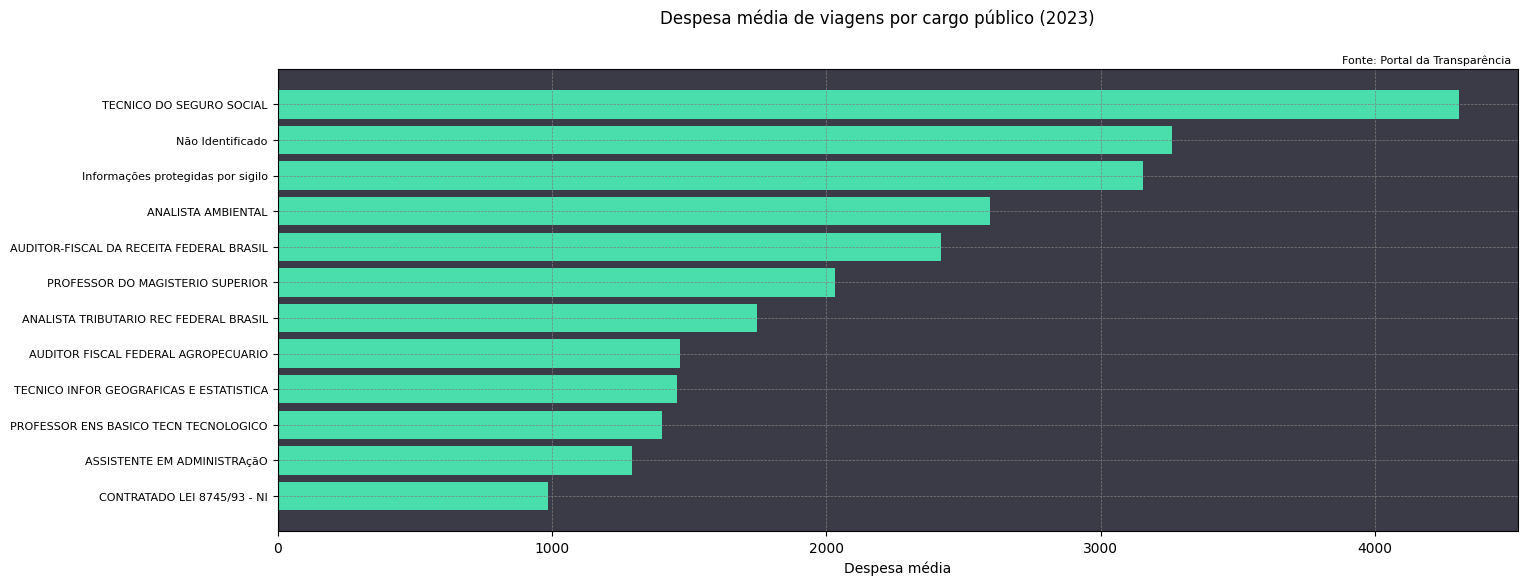

In [34]:
import matplotlib.pyplot as plt

#Criando a figura
fig, ax = plt.subplots(figsize = (16,6))

#Plotando o gráfico
ax.barh(df_final['Cargo'], df_final['despesa_media'],color = '#49deac')
ax.invert_yaxis()

#Ajustando o gráfico
ax.set_facecolor('#3b3b47')
fig.suptitle('Despesa média de viagens por cargo público (2023)')
plt.figtext(0.79, 0.89, 'Fonte: Portal da Transparência', fontsize = 8)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.yticks(fontsize = 8)
plt.xlabel('Despesa média')

#Salvando o gráfico
plt.savefig(caminho_saida_grafico1, bbox_inches = 'tight')


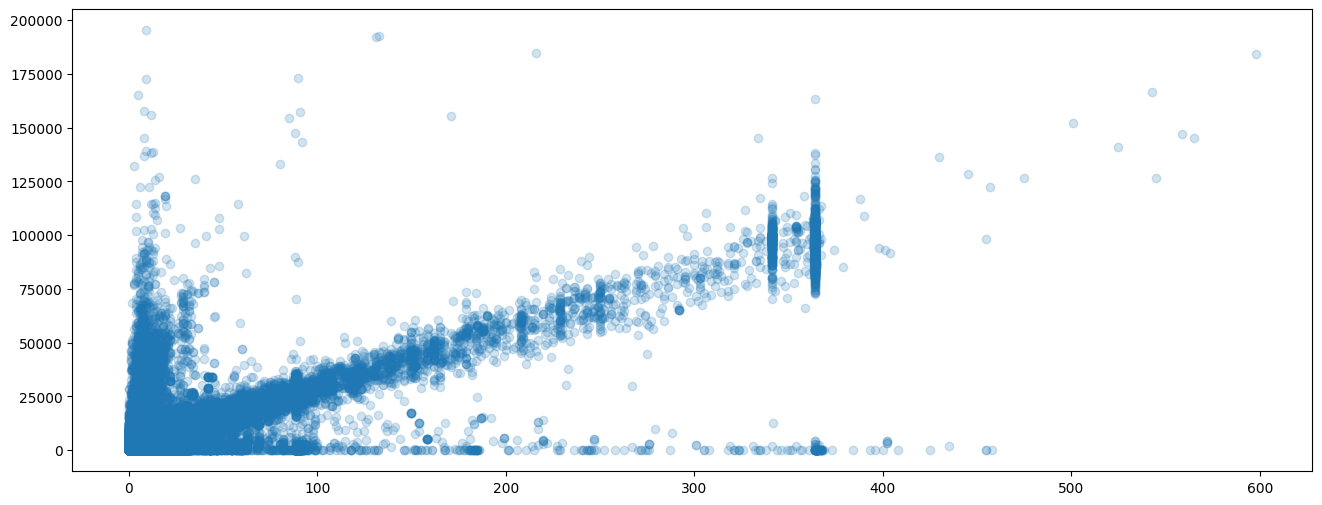

In [35]:
fig, ax = plt.subplots(figsize = (16,6))

ax.scatter(df__viagens['Duração da viagem (dias)'], df__viagens['Despesas'], alpha = 0.2)

plt.savefig(caminho_saida_grafico2, bbox_inches = 'tight')

In [36]:
#filtrando as depesas acima de 175 mil para visualizar detalhadamente os outliers vistos no gráfico scatter
filtro2 = df__viagens['Despesas'] > 175_000

#Fazendo a união do arquivo passagens e viagens
df_tabela_exploratoria = df_passagens.merge(df__viagens[filtro2])
df_tabela_exploratoria = df_tabela_exploratoria.sort_values(by = 'Despesas', ascending=False)

#Salvando a tabela df_final
df_tabela_exploratoria.to_excel(caminho_saida_tabela2, index=False)

